<a href="https://colab.research.google.com/github/lucianomcsilva/RIWRS/blob/main/%5BRIWRS%5D_PLN_palavras_mais_comuns_do_portugues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analise de palavras de milhares de artigos da uol**


In [1]:
import urllib.request

texto = []

# f = open ("mario_quitana.txt",'r') # para arquivos locais
# for line in f:
#   texto.append(line)


import pandas as pd
pd_texto = pd.read_json('https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json')
texto = texto = ' '.join(pd_texto['content'])
#texto  
texto = texto.lower() # para unicidade
texto = texto.replace('\n','')
texto = texto.replace('.','')
texto = texto.replace(',','')
texto = texto.replace('(','')
texto = texto.replace(')','')
texto = texto.replace('?','')
texto = texto.replace('\'','') # elimina ' e "


  # for i in range(len(texto)):
  #   texto[i] = texto[i].lower() # para unicidade
  #   texto[i] = texto[i].replace('\n','')
  #   texto[i] = texto[i].replace('.','')
  #   texto[i] = texto[i].replace(',','')
  #   texto[i] = texto[i].replace('(','')
  #   texto[i] = texto[i].replace(')','')
  #   texto[i] = texto[i].replace('?','')
  #   texto[i] = texto[i].replace('\'','') # elimina ' e "
  #   texto[i] = texto[i].replace('que','')
  #   texto[i] = texto[i].replace('um','')    

# **Criando dicionário**



In [6]:
mydict = {}                             

texto = texto.lower()                   
words = texto.split()                 
#print(words)

for word in words:                     
  if word not in mydict.keys():        
    mydict[word] = 1                    # acrescenta a word com o valor 1
  else:                                 # se a entrada já existe 
    mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente


In [ ]:
sorted(mydict.items(), key=lambda x: -x[1])[0:30]

In [7]:

import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(), columns=['word', 'count']).sort_values('count',ascending=False)
#df = df[df['count'] > 100] 

df = df[0:100]
df

,word,count
5,de,100959
40,o,77952
3,a,75951
59,que,66878
15,e,52756
...,...,...
235,vez,1889
1649,câmara,1848
7629,trump,1822
1334,—,1792


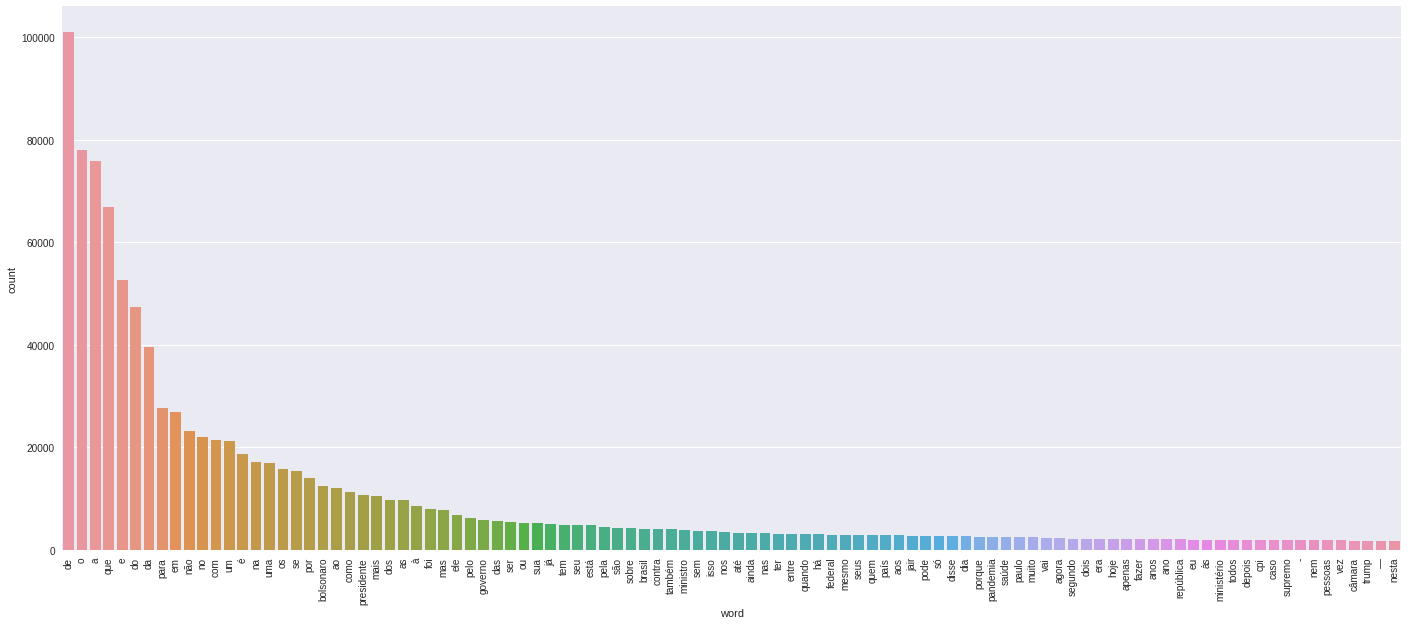

In [8]:
plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()